**ЛР 4 Регрессия**

Булатова Ксения

Группа: ПМИ - 24 НМ

In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [64]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Вычисление "скорректировнного R2"
    # Сначала вычислим коэффициент детерминации R2
    r2 = model.score(X_test, y_test)
    # Размер тестовой выборки
    n = X_test.shape[0]
    # Количество признаков
    p = X_test.shape[1]
    # Вычислим "Скорректировнный R2"
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(), 4)}')
    return R2, adjusted_r2, CV_R2, RMSE

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
dtf = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')
dtf.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
dtf.drop(columns=['Person ID'], inplace=True)
dtf.drop(columns=['Occupation'], inplace=True)
dtf.drop(columns=['Blood Pressure'], inplace=True)
dtf['BMI Category'] = dtf['BMI Category'].map({'Normal Weight': 2, 'Normal': 2, 'Overweight': 1, 'Obese': 0})
dtf['Sleep Disorder'].replace('Sleep Apnea', 2, inplace=True)
dtf['Sleep Disorder'].replace('Insomnia', 1, inplace=True)
dtf['Sleep Disorder'].fillna(0, inplace = True)

In [6]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
dtf[['Gender']] = enc.fit_transform(dtf[['Gender']])
dtf.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,1.0,27,6.1,6,42,6,1,77,4200,0.0
1,1.0,28,6.2,6,60,8,2,75,10000,0.0
2,1.0,28,6.2,6,60,8,2,75,10000,0.0
3,1.0,28,5.9,4,30,8,0,85,3000,2.0
4,1.0,28,5.9,4,30,8,0,85,3000,2.0


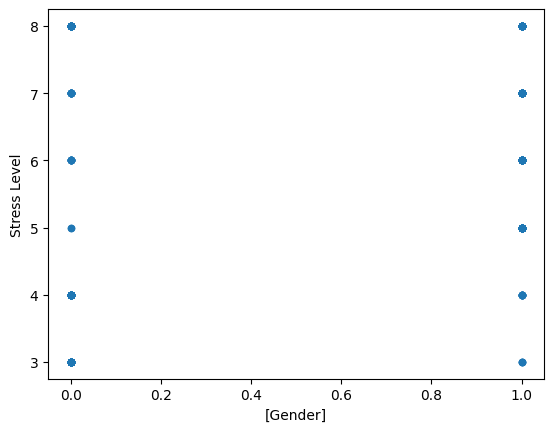

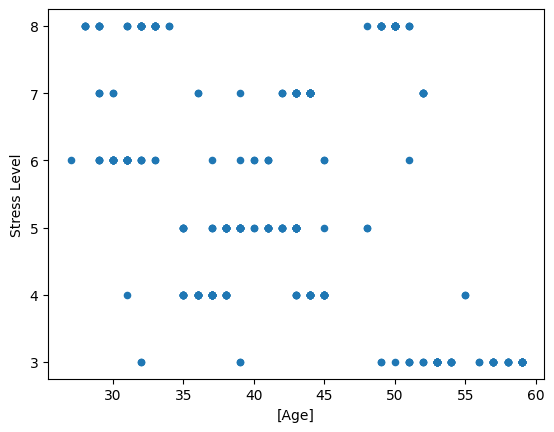

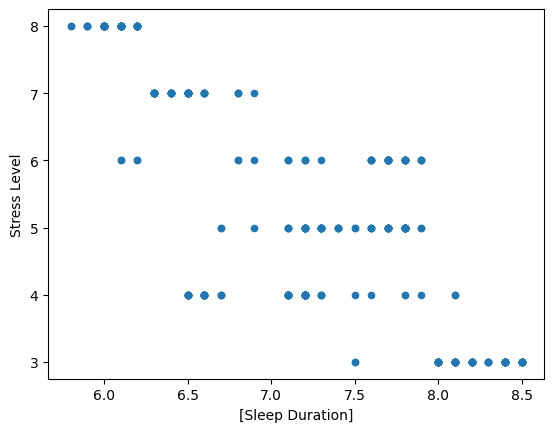

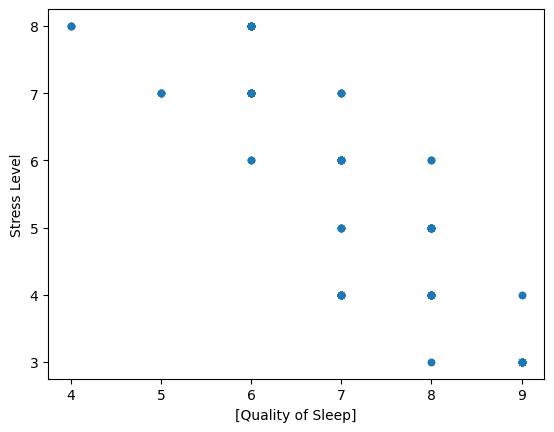

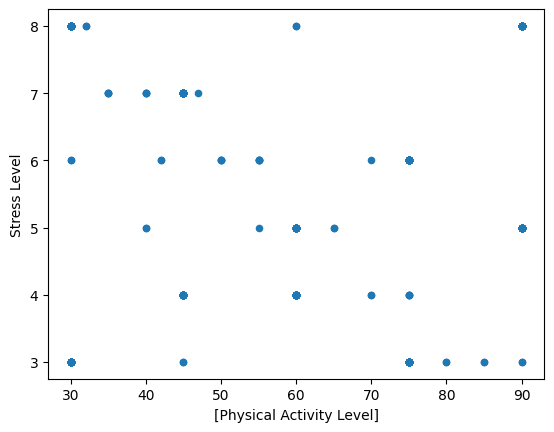

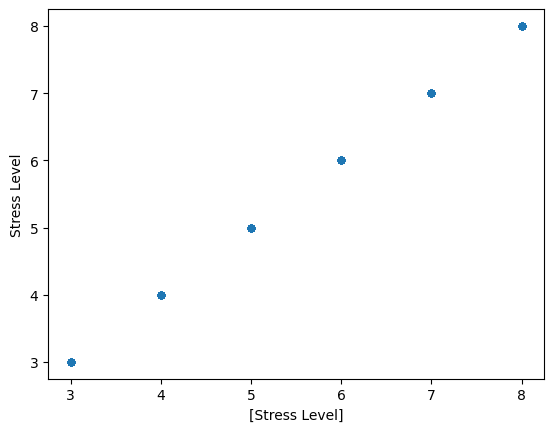

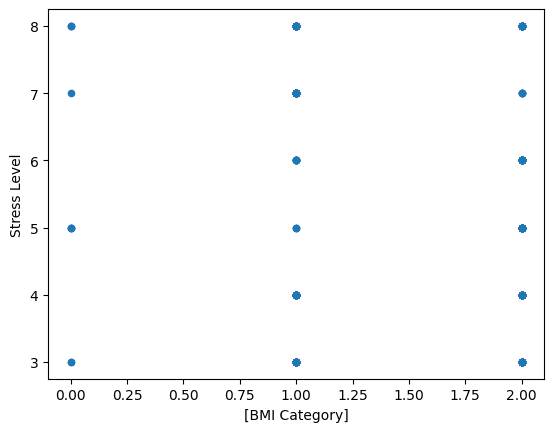

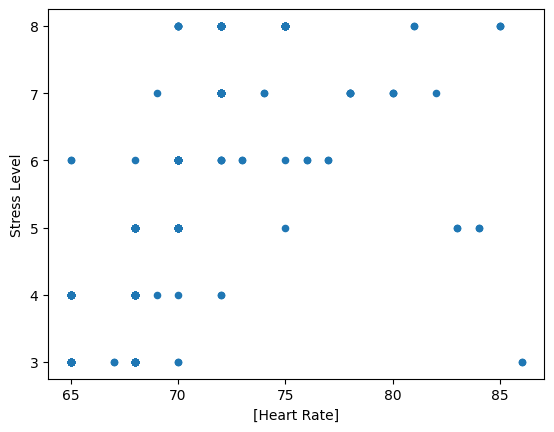

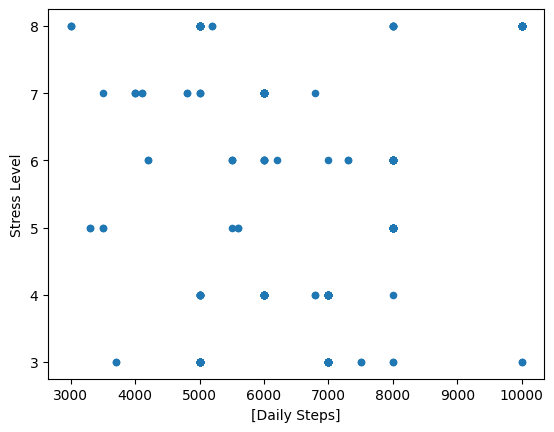

In [38]:
for i, col in enumerate(dtf.columns.values[:-1]):
 dtf.plot(x=[col], y='Stress Level', kind='scatter')
plt.show()

In [39]:
X = dtf.drop(['Stress Level'], axis=1)
y = dtf['Stress Level']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (374, 9) | y shape: (374,) 


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

Линейная регрессия

In [62]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
modelLR = LinearRegression()

# Fit the model to the data
modelLR.fit(X_train, y_train)

# Predict the response for a new data point
y_pr_LR = modelLR.predict(X_test)

In [65]:
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  0.4536
  R2: 0.9358
 Adjusted R2: 0.9269
 Cross Validated R2: 0.9313


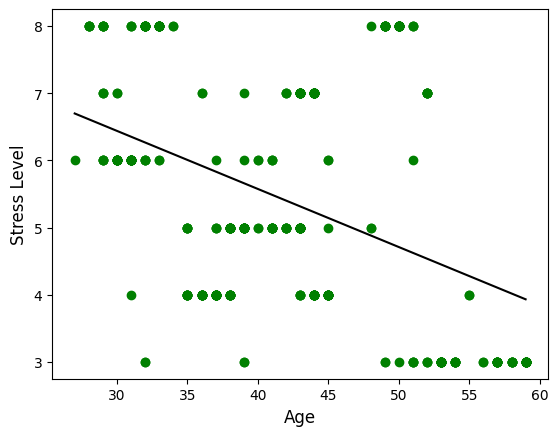

In [78]:
X2 = dtf['Age'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Stress Level'].values

model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Stress Level', size=12)
plt.xlabel('Age', size=12)
plt.show()

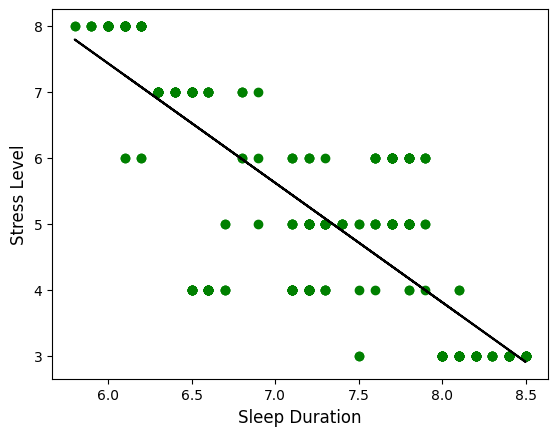

In [74]:
X2 = dtf['Sleep Duration'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Stress Level'].values

model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Stress Level', size=12)
plt.xlabel('Sleep Duration', size=12)
plt.show()

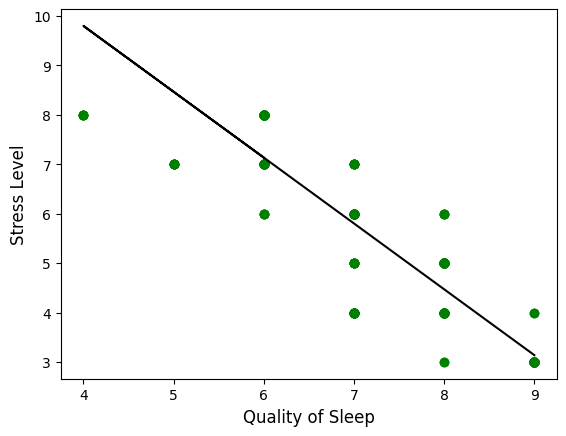

In [75]:
X2 = dtf['Quality of Sleep'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Stress Level'].values

model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Stress Level', size=12)
plt.xlabel('Quality of Sleep', size=12)
plt.show()

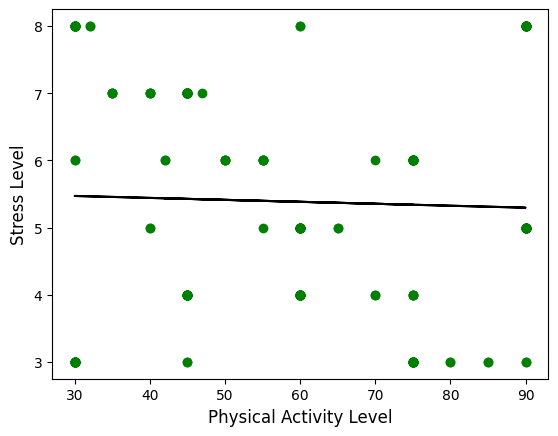

In [72]:
X2 = dtf['Physical Activity Level'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Stress Level'].values

model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Stress Level', size=12)
plt.xlabel('Physical Activity Level', size=12)
plt.show()

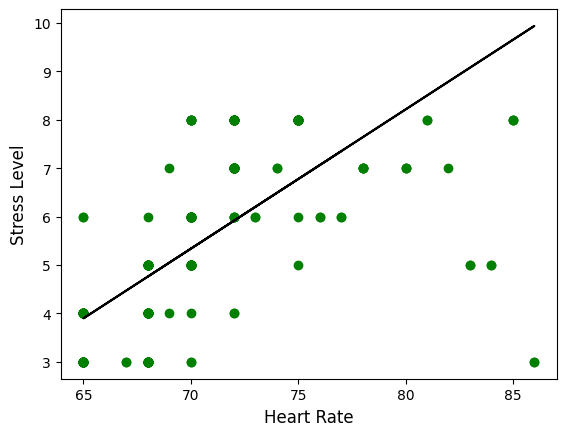

In [79]:
X2 = dtf['Heart Rate'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Stress Level'].values

model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Stress Level', size=12)
plt.xlabel('Heart Rate', size=12)
plt.show()

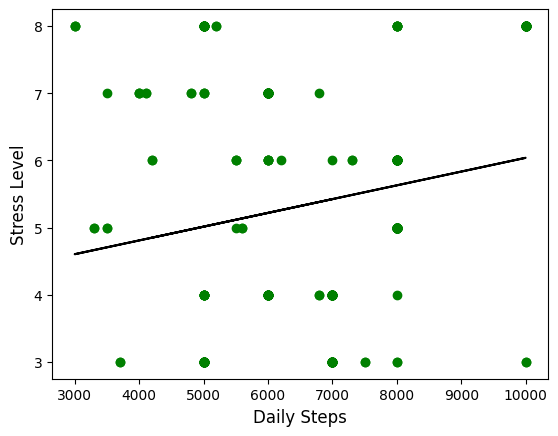

In [80]:
X2 = dtf['Daily Steps'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Stress Level'].values

model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Stress Level', size=12)
plt.xlabel('Daily Steps', size=12)
plt.show()

Регрессия дерева принятия решений

In [48]:
from sklearn.tree import DecisionTreeRegressor

# Create a stepwise regression model
modelDT = DecisionTreeRegressor()

# Fit the model to the data
modelDT.fit(X_train, y_train)

# Predict the response for a new data point
y_dt_pred = modelDT.predict(X_test)

In [49]:
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  0.3055
  R2: 0.9709
 Adjusted R2: 0.9669
 Cross Validated R2: 0.9841


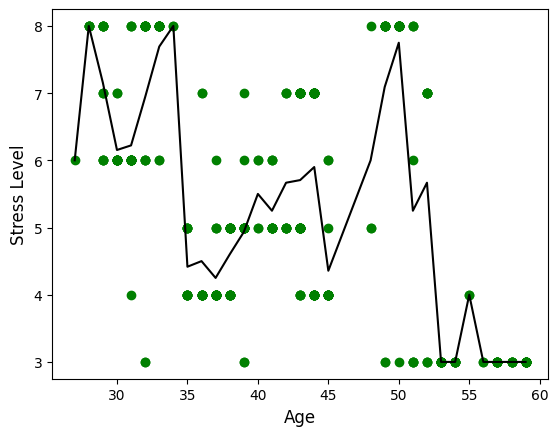

In [81]:
X2 = dtf['Age'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Stress Level'].values

poly_features = poly.fit_transform(X2)

model2 = DecisionTreeRegressor()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Stress Level', size=12)
plt.xlabel('Age', size=12)
plt.show()

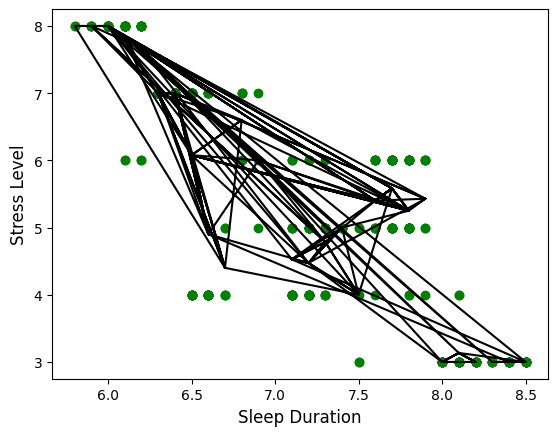

In [82]:
X2 = dtf['Sleep Duration'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Stress Level'].values

poly_features = poly.fit_transform(X2)

model2 = DecisionTreeRegressor()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Stress Level', size=12)
plt.xlabel('Sleep Duration', size=12)
plt.show()

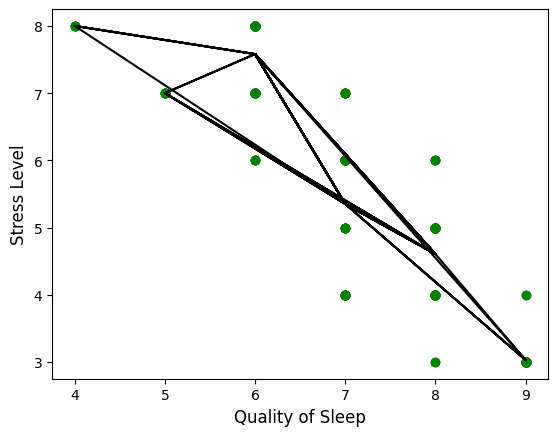

In [83]:
X2 = dtf['Quality of Sleep'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Stress Level'].values

poly_features = poly.fit_transform(X2)

model2 = DecisionTreeRegressor()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Stress Level', size=12)
plt.xlabel('Quality of Sleep', size=12)
plt.show()

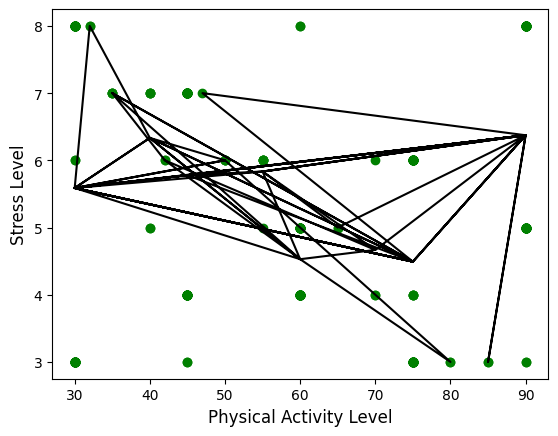

In [50]:
X2 = dtf['Physical Activity Level'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Stress Level'].values

poly_features = poly.fit_transform(X2)

model2 = DecisionTreeRegressor()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Stress Level', size=12)
plt.xlabel('Physical Activity Level', size=12)
plt.show()

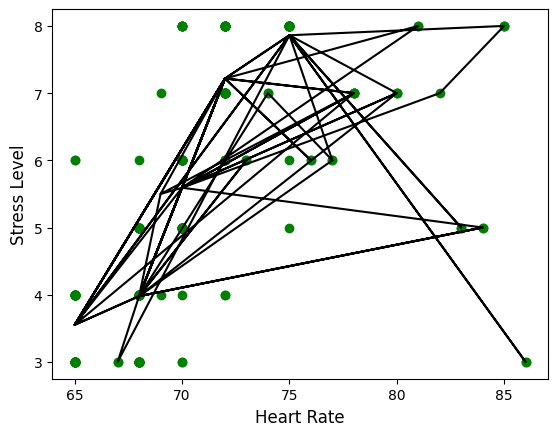

In [84]:
X2 = dtf['Heart Rate'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Stress Level'].values

poly_features = poly.fit_transform(X2)

model2 = DecisionTreeRegressor()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Stress Level', size=12)
plt.xlabel('Heart Rate', size=12)
plt.show()

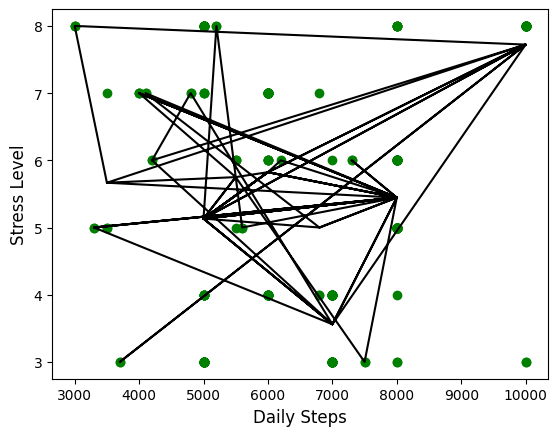

In [85]:
X2 = dtf['Daily Steps'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Stress Level'].values

poly_features = poly.fit_transform(X2)

model2 = DecisionTreeRegressor()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Stress Level', size=12)
plt.xlabel('Daily Steps', size=12)
plt.show()

Регрессия случайного леса

In [51]:
from sklearn.ensemble import RandomForestRegressor

# Create a stepwise regression model
modelRF = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
modelRF.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelRF.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.312
  R2: 0.9696
 Adjusted R2: 0.9654
 Cross Validated R2: 0.9813


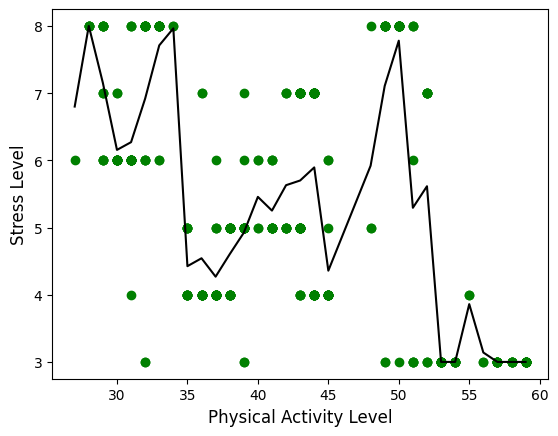

In [71]:
X2 = dtf['Age'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Stress Level'].values

poly_features = poly.fit_transform(X2)

model2 = RandomForestRegressor()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Stress Level', size=12)
plt.xlabel('Physical Activity Level', size=12)
plt.show()

Регрессия ElasticNet

In [66]:
from sklearn.linear_model import ElasticNet

# Create an elastic net regression model
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Fit the model to the data
modelEN.fit(X_train, y_train)

# Predict the response for a new data point
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  0.6309
  R2: 0.8758
 Adjusted R2: 0.8587
 Cross Validated R2: 0.8714


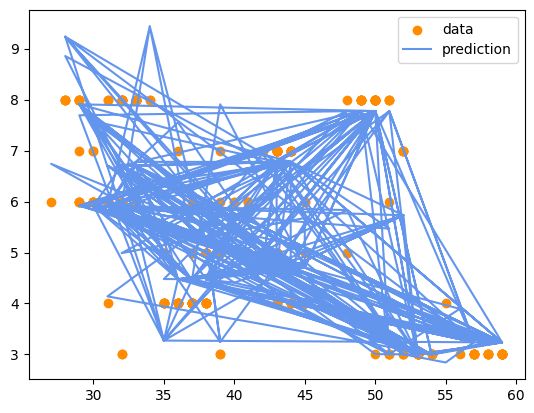

In [68]:
plt.scatter(X_train["Age"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Age"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

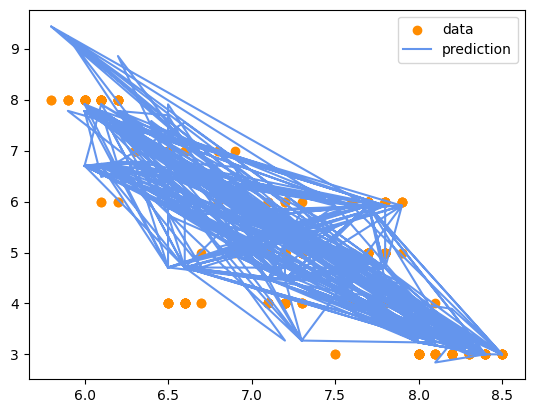

In [86]:
plt.scatter(X_train["Sleep Duration"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Sleep Duration"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

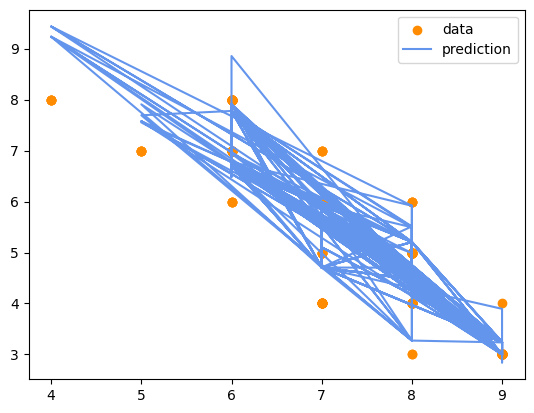

In [87]:
plt.scatter(X_train["Quality of Sleep"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Quality of Sleep"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

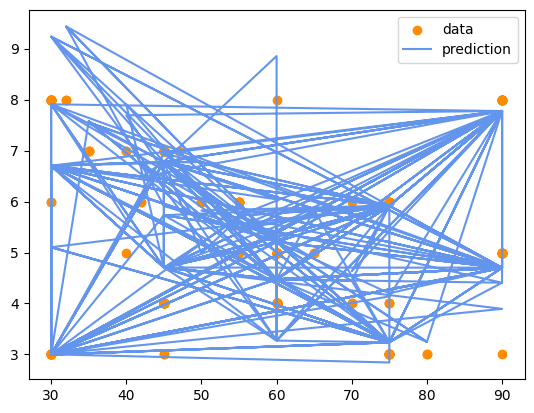

In [58]:
plt.scatter(X_train["Physical Activity Level"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Physical Activity Level"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

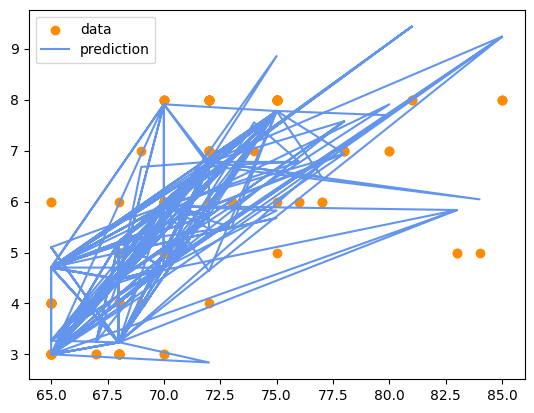

In [88]:
plt.scatter(X_train["Heart Rate"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Heart Rate"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

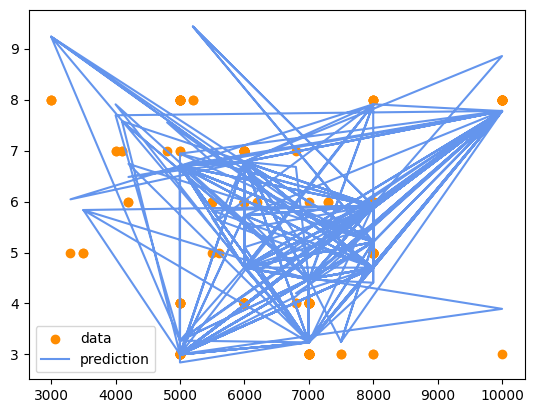

In [89]:
plt.scatter(X_train["Daily Steps"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Daily Steps"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()